<div>
    <img src='../../pics/banner.PNG'/>
</div>
<div>
    <img width="10%" height="10%" src='../../pics/python-programming.png'/>
    <img src='../../pics/miw.PNG'/>
</div>
<div>
    <em>Author: Jeroen Boogaard</em>
</div>

<h1>Numpy</h1>

**Imports**

In [1]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

**Gebruik de numpy methode <i>flip</i> voor het spiegelen van een image**

<h2>Opdracht 1</h2>
<ol>
    <li>Spiegel pImg over de hortizontale as en ken de resulterende afbeelding toe aan variabele <u>bImg</u></li>
    <li>Spiegel qImg over de hortizontale as en ken de resulterende afbeelding toe aan variabele <u>dImg</u></li>
    <li>Geef bImg en dImg naast elkaar weer op de lege plaatsen in het raster</li>    
</ol>

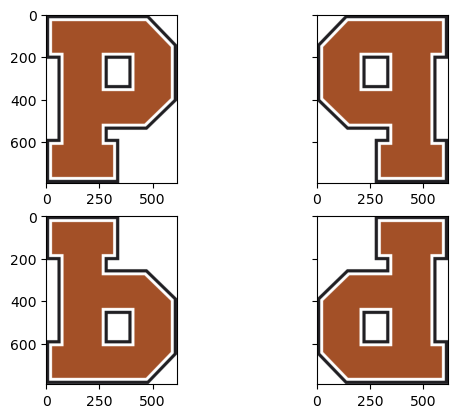

In [12]:
pImg = cv2.imread("../../pics/letter_p.png")

# Maak een raster voor 4 images
fig, axs = plt.subplots(2, 2, sharey=True)
             
axs[0][0].imshow(pImg)

# Spiegel over de verticale as
qImg = np.flip(pImg, axis=1)
axs[0][1].imshow(qImg)


# de eerst image gespiegeld over de horizontale as
bImg = np.flip(pImg, axis=0)
axs[1][0].imshow(bImg)

# de tweede image gespiegeld over de horizontale as
dImg = np.flip(qImg, axis=0)
axs[1][1].imshow(dImg)

<h2>Opdracht 2</h2>

<h3>Gegeven</h3>

Planeet | Grootte to.v. de omvang van de Aarde
---|---
Jupiter | 1120%
Saturnus | 945%
Uranus | 400%
Neptunus | 388%
Aarde| 100%
Venus | 95%
Mars | 53%
Mercury | 33%

In [19]:
filename = "../../csv/planets.csv"

<h3>Gevraagd</h3>
<p>
Schaal voor elke (erkende) planeet uit ons zonnestelsel de bijbehorende image t.o.v. van de aarde. Het geschaalde plaatje moet groter zijn dan het plaatje van de aarde als de bijbehorende planeet groter is dan de aarde. Is de planeet kleiner dan de aarde dan moet het nieuwe plaatje kleiner zijn. Gebruik voor de schaalfactor het percentage. 
<br>Tip: Indien nodig kun je de images normaliseren door eerst het plaatje van de aarde naar de gete schalen.
</p>

<h3>Oplossing</h3>
<ol>
    <li>
        <strong>Open het bestand csv/planets.csv en voeg daar de kolom <i>image</i></strong>
    </li>
    <li>
        <strong>Importeer het csv-bestand en sla de data op in een dictionary</strong>
    </li>
    <li>
        <strong>Open een image uit van een item uit de dictionary</strong>
    </li>
    <li>
        <strong>Schaal de image m.b.v. een <i>numpy array</i></strong>
    </li>
    <li>
        <strong>Sla de geschaalde image op</strong>
    </li>
    <li>
        <strong>Schrijf een functie voor het schalen van een image</strong>
    </li>    
    <li>
        <strong>Maak een loop waarbij voor elke planeet een geschaalde image wordt gemaakt en opgelagen</strong>
    </li>    
</ol>    

In [45]:
from csv import DictReader

with open(filename, 'r') as f:
     
    dict_reader = DictReader(f)
     
    list_of_dict = list(dict_reader)
   
    print(list_of_dict)

[{'Name': 'Mercury', ' Diameter': ' 4879.4', ' Mass': ' 3.302×10^23', ' Inclination': ' 7.004', ' Eccentricity': ' 0.20563593', ' Semi_majorAxis': ' 0.38709927', ' SurfaceGravity': ' 3.7', ' OrbitalPeriod': ' 0.241', ' SiderealRotation': ' 58.65', ' Satellites': ' 0', ' DistanceToSun': ' 0.39', ' Type': ' terrestrial', ' Image': '../../pics/mercury.jpg'}, {'Name': 'Venus', ' Diameter': ' 12103.6', ' Mass': ' 4.869×10^24', ' Inclination': ' 3.39471', ' Eccentricity': ' 0.00677672', ' Semi_majorAxis': ' 0.72333566', ' SurfaceGravity': ' 8.87', ' OrbitalPeriod': ' 0.615', ' SiderealRotation': ' 243.0187', ' Satellites': ' 0', ' DistanceToSun': ' 0.723', ' Type': ' terrestrial', ' Image': '../../pics/venus.jpg'}, {'Name': 'Earth', ' Diameter': ' 12756.3', ' Mass': ' 5.974×10^24', ' Inclination': ' 0.00005', ' Eccentricity': ' 0.01671123', ' Semi_majorAxis': ' 1.00000261', ' SurfaceGravity': ' 9.78', ' OrbitalPeriod': ' 1', ' SiderealRotation': ' 0.997271', ' Satellites': ' 1', ' DistanceTo

**Stap 2: Importeer het csv-bestand en sla de data op in een dictionary**

In [21]:
planetDataFrame = pd.read_csv(filename, header = 0, sep = ',')
print(planetDataFrame)
type(planetDataFrame)
print(planetDataFrame.columns)




      Name   Diameter          Mass   Inclination   Eccentricity  \
0  Mercury     4879.4   3.302×10^23       7.00400       0.205636   
1    Venus    12103.6   4.869×10^24       3.39471       0.006777   
2    Earth    12756.3   5.974×10^24       0.00005       0.016711   
3     Mars     6794.4   6.419×10^23       1.85061       0.093394   
4  Jupiter   142984.0   1.899×10^27       1.30530       0.048386   
5   Saturn   120536.0   5.688×10^26       2.48446       0.053862   
6   Uranus    51118.0   8.683×10^25       0.77400       0.047257   
7  Neptune    49572.0   1.024×10^26       1.76917       0.008590   

    Semi_majorAxis   SurfaceGravity   OrbitalPeriod   SiderealRotation  \
0         0.387099             3.70           0.241          58.650000   
1         0.723336             8.87           0.615         243.018700   
2         1.000003             9.78           1.000           0.997271   
3         1.523710             3.71           1.881           1.025950   
4         5.20288

**Stap 3: Open een image uit van een item uit de dictionary**

In [18]:
img = Image.open('../../pics/earth.jpg')
type(img)
img.show()

In [51]:
img_2 = Image.open(list_of_dict[0][' Image'])
img_2.show()

**Stap 4: Schaal de image m.b.v. een numpy array**

In [16]:
array = np.array(img)
type(array)
scaleFactor = 2
scaleArray = ndimage.zoom(array, (scaleFactor, scaleFactor, 1))
imgScaled = Image.fromarray(scaleArray)
imgScaled.show()

In [80]:
#De scaling factor kunnen we berekenen door elke 'diameter' te delen door die van de aarde, en dat is 12756.3

#Bijvoorbeeld voor de de eerste planeet, mercury:

array_1 = np.array(img_2)
scale_factor = float(list_of_dict[0][' Diameter']) / 12756.3

scaleArray_1 = ndimage.zoom(array_1, (scale_factor, scale_factor, 1))
mercury_scaled = Image.fromarray(scaleArray_1)
mercury_scaled.show()

**Stap 5: Sla de geschaalde image op**

In [75]:
imgScaled.save(img.filename.replace(".jpg","_scaled.jpg"))
type(imgScaled)

PIL.Image.Image

**Stap 6: Schrijf een functie voor het schalen van een image**

In [92]:
def scale_image(input_dict):
    #eerst zorgen we dat we voor elke dictionary/planeet het bestand openen
    img_file = Image.open(input_dict[' Image'])
    
    
    #vervolgens maken we van het plaatje een numpy array
    input_array = np.array(img_file)
    
    #we berekenen de scale factor door de diameter van de planeet te delen door die van de aarde
    scale_factor = round(float(input_dict[' Diameter']) / 12756.3, 2)
    
    #we 'scalen' de input array en outputten deze als een nieuwe array
    scaled_array = ndimage.zoom(input_array, (scale_factor, scale_factor, 1))
    
    #we maken een nieuw plaatje van de gescalede array
    planet_scaled = Image.fromarray(scaled_array)
    
    #even een berichtje
    print(f"Scaling planet {input_dict['Name']} by a factor of {scale_factor}")
    
    #we slaan het plaatje op 
    planet_scaled.save(img_file.filename.replace(".jpg", "_scaled.jpg"))

**Stap 7: Maak een loop waarbij voor elke planeet een geschaalde image wordt gemaakt en opgelagen**

In [93]:
# Oplossing

for planet in list_of_dict:
    scale_image(planet)
    
    

Scaling planet Mercury by a factor of 0.38
Scaling planet Venus by a factor of 0.95
Scaling planet Earth by a factor of 1.0
Scaling planet Mars by a factor of 0.53
Scaling planet Jupiter by a factor of 11.21
Scaling planet Saturn by a factor of 9.45
Scaling planet Uranus by a factor of 4.01
Scaling planet Neptune by a factor of 3.89


</ol>